# Evaluation procedure for SYNTHIA

In [12]:
import numpy as np
import cv2
import os


focal = 532.7403520000000

principal_point_x = 640

principal_point_y = 380

baseline = 0.8

width, height = 1280, 760

## Load predicted disparities

In [2]:
predicted_disps = np.load("../data/output/run_19-03-02_13h:39m_resnet50_md_synthia/test/disparities.npy")

In [3]:
predicted_disps = predicted_disps[:295]

In [4]:
predicted_disps.shape

(295, 256, 512)

## Setup file paths

In [5]:
filenames_file = "../resources/filenames/synthia_spring_05.txt"
root_dir = "../data/synthia"

with open(filenames_file) as filenames:
    left_image_paths = sorted(
        os.path.join(root_dir, fname.split()[0]) for fname in filenames
    )

left_depth_paths = ["/".join([path if path != "RGB" else "Depth" for path in str.split(image_path, "/")]) for image_path in left_image_paths]

len(left_depth_paths)

295

## Load ground truth depth

In [39]:
img = cv2.imread(left_depth_paths[100], cv2.IMREAD_UNCHANGED).astype(np.float32)

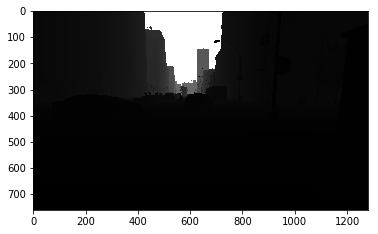

In [40]:
import matplotlib.pyplot as plt
plt.imshow(img / img.max(), cmap="gray")
plt.show()

In [41]:
img[:,:,2]

array([[2182., 2185., 2184., ..., 1932., 1932., 1933.],
       [2182., 2185., 2189., ..., 1932., 1933., 1933.],
       [2182., 2185., 2189., ..., 1933., 1933., 1933.],
       ...,
       [ 192.,  192.,  192., ...,  232.,  232.,  232.],
       [ 191.,  191.,  191., ...,  232.,  232.,  232.],
       [ 191.,  191.,  191., ...,  231.,  231.,  231.]], dtype=float32)

array([[ 3.1005933,  3.3288145,  4.7178574, ...,  9.658443 ,  9.873075 ,
         9.928231 ],
       [ 3.113033 ,  3.3422143,  4.7372346, ...,  9.66631  ,  9.886889 ,
         9.943615 ],
       [ 4.1885076,  4.502068 ,  6.426466 , ..., 10.197915 , 10.859295 ,
        11.038264 ],
       ...,
       [12.230695 , 12.725843 , 15.184819 , ...,  3.721062 ,  3.3902466,
         3.3165338],
       [ 8.842777 ,  9.187265 , 10.883165 , ...,  3.1202474,  2.8468986,
         2.7858841],
       [ 8.804669 ,  9.147522 , 10.835204 , ...,  3.112395 ,  2.8397872,
         2.7789369]], dtype=float32)

## Convert predicted disparity to depth

In [10]:
pred_disp = predicted_disps[10]
pred_disp = width * cv2.resize(
    pred_disp, (width, height), interpolation=cv2.INTER_LINEAR
)

pred_depth = baseline * focal / pred_disp
pred_depth

(760, 1280, 3)